In [ ]:
!pip install ultralytics

# download and preprocess the dataset 

In [ ]:
from data_preprocessing import *

In [ ]:
dataset_downloader = DatasetDownloader("yahyaahmed1012/egyptian-national-ids")
annotation_processor = AnnotationProcessor()
data_splitter = DatasetSplitter()

In [ ]:
dataset_downloader.download_dataset()

Using Colab cache for faster access to the 'egyptian-national-ids' dataset.
/kaggle/input/egyptian-national-ids


In [ ]:
print(dataset_downloader.download_path)

/kaggle/input/egyptian-national-ids


In [ ]:
!ls /root/.cache/kagglehub/datasets/yahyaahmed1012/egyptian-national-ids/versions/1/dataset

'images 1'  'images 2'	'images 3'  'labels 1'	'labels 2'  'labels 3'


### put all dataset images in one directory

In [ ]:
source_folders = [
    "/root/.cache/kagglehub/datasets/yahyaahmed1012/egyptian-national-ids/versions/1/dataset/images 3",
    "/root/.cache/kagglehub/datasets/yahyaahmed1012/egyptian-national-ids/versions/1/dataset/images 2",
    "/root/.cache/kagglehub/datasets/yahyaahmed1012/egyptian-national-ids/versions/1/dataset/images 1"
]

destination_folder = "/root/.cache/kagglehub/datasets/yahyaahmed1012/egyptian-national-ids/versions/1/dataset/all_images"
dataset_downloader.copy_files_to_destination(source_folders, destination_folder)

In [ ]:
source_folders = [
    "/root/.cache/kagglehub/datasets/yahyaahmed1012/egyptian-national-ids/versions/1/dataset/labels 1",
    "/root/.cache/kagglehub/datasets/yahyaahmed1012/egyptian-national-ids/versions/1/dataset/labels 2",
    "/root/.cache/kagglehub/datasets/yahyaahmed1012/egyptian-national-ids/versions/1/dataset/labels 3"
]

destination_folder = "/root/.cache/kagglehub/datasets/yahyaahmed1012/egyptian-national-ids/versions/1/dataset/all_labels"

dataset_downloader.copy_files_to_destination(source_folders, destination_folder)

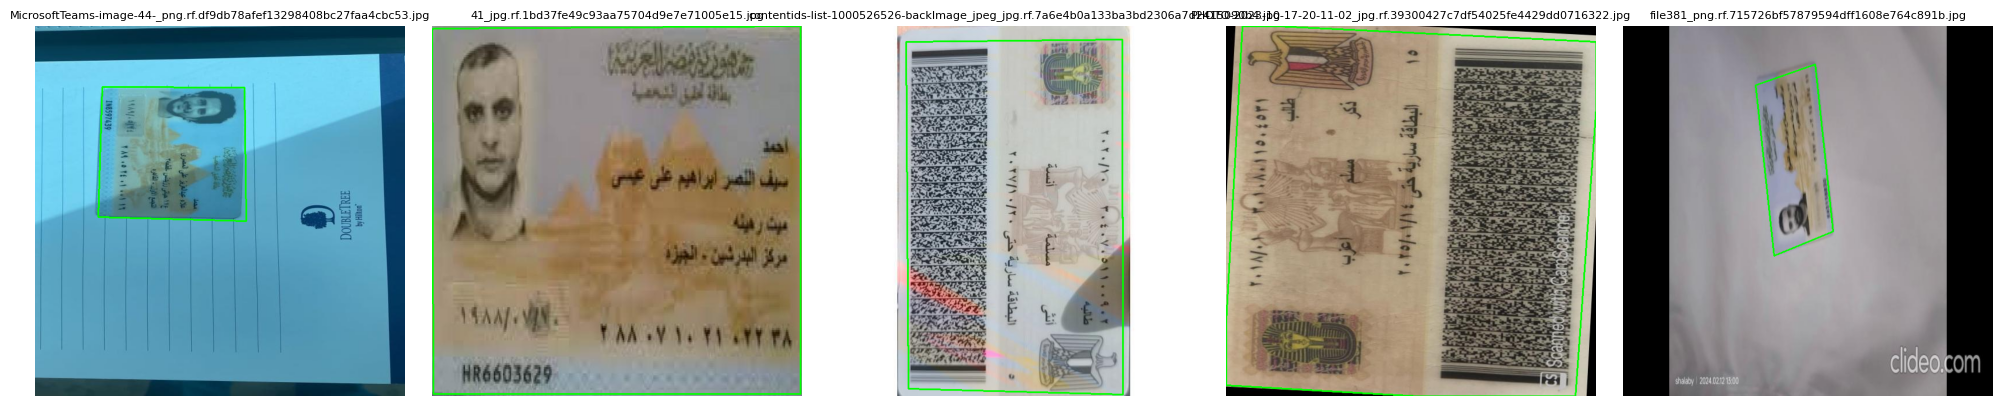

In [ ]:
IMAGE_DIR = "/root/.cache/kagglehub/datasets/yahyaahmed1012/egyptian-national-ids/versions/1/dataset/all_images/"
LABEL_DIR = "/root/.cache/kagglehub/datasets/yahyaahmed1012/egyptian-national-ids/versions/1/dataset/all_labels/"

annotation_processor.display_random_images(IMAGE_DIR, LABEL_DIR, num_images=5)

### convert annotations to single class as all we need to detect IDs

In [ ]:
INPUT_LABEL_DIR = "/root/.cache/kagglehub/datasets/yahyaahmed1012/egyptian-national-ids/versions/1/dataset/all_labels/"
OUTPUT_LABEL_DIR = "/root/.cache/kagglehub/datasets/yahyaahmed1012/egyptian-national-ids/versions/1/dataset/yolo_labels/"

NEW_CLASS_ID = 0

annotation_processor.convert_annotations_to_single_class(INPUT_LABEL_DIR, OUTPUT_LABEL_DIR, NEW_CLASS_ID)

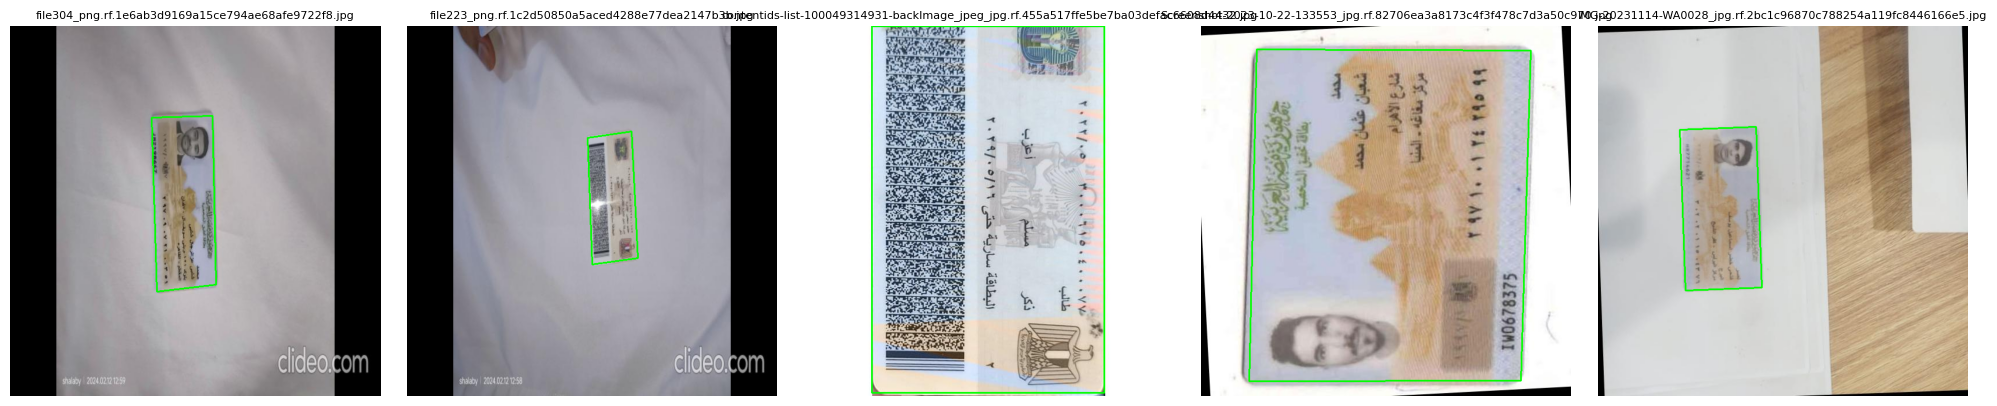

In [ ]:
IMAGE_DIR = "/root/.cache/kagglehub/datasets/yahyaahmed1012/egyptian-national-ids/versions/1/dataset/all_images/"
LABEL_DIR = "/root/.cache/kagglehub/datasets/yahyaahmed1012/egyptian-national-ids/versions/1/dataset/yolo_labels/"

annotation_processor.display_random_images(IMAGE_DIR, LABEL_DIR, num_images=5)

### split the dataset to train, validation and test 

In [ ]:
IMAGE_DIR = "/root/.cache/kagglehub/datasets/yahyaahmed1012/egyptian-national-ids/versions/1/dataset/all_images/"
LABEL_DIR = "/root/.cache/kagglehub/datasets/yahyaahmed1012/egyptian-national-ids/versions/1/dataset/yolo_labels/"

OUTPUT_DIR = "/root/.cache/kagglehub/datasets/yahyaahmed1012/egyptian-national-ids/versions/1/dataset/"
DATASET_NAME = "my_dataset"

train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

data_splitter.split_dataset(IMAGE_DIR, LABEL_DIR, OUTPUT_DIR, DATASET_NAME, train_ratio, val_ratio, test_ratio)

'/root/.cache/kagglehub/datasets/yahyaahmed1012/egyptian-national-ids/versions/1/dataset/data.yaml'

# Training

In [ ]:
import os
import random
import yaml
from ultralytics import YOLO
from IPython.display import Image, display

DATA_YAML_PATH = "/root/.cache/kagglehub/datasets/yahyaahmed1012/egyptian-national-ids/versions/1/dataset/data.yaml"


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Load the pre-trained YOLOv11 detection model
model = YOLO('yolo11n.pt')

In [ ]:

results = model.train(
    data=DATA_YAML_PATH,  # Path to your dataset YAML file
    epochs=100,            # Number of training epochs
    imgsz=640,            # Input image size
    batch=16,             # Number of images per batch
    patience=10,          # Stop training early if no improvement
    project='egyptian_id_project', # Project name
    name='yolov11n_finetune',      # Experiment name
    seed=42               # For reproducibility
)

print("\nModel training complete!")

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/root/.cache/kagglehub/datasets/yahyaahmed1012/egyptian-national-ids/versions/1/dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov11n_finetune2, nbs=64, nms=False, opset=None, optimize=False, o

# Evaluating the model on the test dataset

In [22]:
import os
import random
import yaml
from ultralytics import YOLO
from IPython.display import Image, display

project_dir = 'egyptian_id_project'
run_name = 'yolov11n_finetune2'
best_model_path = os.path.join(project_dir, run_name, 'weights', 'best.pt')

best_model = YOLO(best_model_path)

print("Evaluation on the test set")
metrics = best_model.val(split='test', data=DATA_YAML_PATH) # Added data path to ensure correct split is found

# Print the final metrics
print("\n--- Final Evaluation Results on Test Set ---")
print(f"Test Set mAP50-95: {metrics.box.map}")
print(f"Test Set mAP50: {metrics.box.map50}")
print(f"Test Set mAP75: {metrics.box.map75}")

Evaluation on the test set
Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 958.5±311.9 MB/s, size: 44.5 KB)
val: Scanning /root/.cache/kagglehub/datasets/yahyaahmed1012/egyptian-national-ids/versions/1/dataset/labels/test... 364 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 364/364 1.1Kit/s 0.3s
val: New cache created: /root/.cache/kagglehub/datasets/yahyaahmed1012/egyptian-national-ids/versions/1/dataset/labels/test.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 23/23 4.3it/s 5.3s
                   all        364        407       0.98      0.988      0.994      0.928
Speed: 1.2ms preprocess, 4.2ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to /content/runs/detect/val

--- Final Evaluation Results on Test Set ---
Test Set mAP5

### save the best model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil
from google.colab import drive

project_dir = 'egyptian_id_project'
run_name = 'yolov11n_finetune2'
best_model_path = os.path.join(project_dir, run_name, 'weights', 'best.pt')

destination_folder = '/content/drive/MyDrive/ID_Project_Models'


if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)
    print(f"Created folder: {destination_folder}")

destination_path = os.path.join(destination_folder, 'best_yolov11_id_model.pt')

print(f"\nCopying '{best_model_path}' to '{destination_path}'...")
shutil.copy(best_model_path, destination_path)
